# Universidad Nacional Abierta y a Distancia-UNAD
## ANALISIS DE DATOS
### Estudiante: SHEILA MARCELA LAPEIRA LOPEZ
#### Proyecto Análisis de Datos - Predicción con Regresión Logística: 
#### Quién de los pasajeros del Titanic sobrevivió al naufragio.

### Pasos de la Actividad:
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## Configuración de la base de datos e importaciones de librerías necesarias

In [520]:
#Carga de librerías y configuración de la tabla de los datos 

# Cargar las librerías necesarias para la ejecución
import pandas as data_handler  # Manejo y análisis de estructuras de datos
import numpy as numerical_tools  # Cálculo numérico y análisis de datos
import seaborn as stats_graphs  # Creación de gráficos estadísticos
import matplotlib.pyplot as plotter  # Creación de gráficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics as sk_metrics  # Métricas para evaluación de modelos
from sklearn.model_selection import train_test_split as tts  # División de datos para entrenamiento y prueba
from sklearn.linear_model import LogisticRegression as LogReg  # Modelo de regresión logística
from sklearn.metrics import classification_report as clf_report  # Reporte de clasificación
from sklearn.metrics import confusion_matrix as conf_matrix  # Matriz de confusión

# Carga y lecturas de los datos del archivo CSV con python lIBRERIA PANDAS
Tabla=data_handler.read_csv('./Titanic-Dataset.csv')
# Traducir a español los nombres de las columnas para mayor comprensión
Tabla.rename(
    columns={
                'PassengerId': 'ID Pasajero','Survived': 'Sobrevivió','Pclass': 'Clase','Name': 'Nombre','Sex': 'Sexo','Age': 'Edad',
                'SibSp': 'Hermanos o Esposos','Parch': 'Padres o Hijos','Ticket': 'Número de Boleto','Fare': 'Tarifa','Cabin': 'Cabina',
                'Embarked': 'Puerto de Embarque'
            }, inplace=True)


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

### 1.1 Revisión general del dataset:

#### 1.1.1 Tabla.info(): Muestra un resumen de la estructura del DataFrame o tabla

In [522]:
Tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID Pasajero         891 non-null    int64  
 1   Sobrevivió          891 non-null    int64  
 2   Clase               891 non-null    int64  
 3   Nombre              891 non-null    object 
 4   Sexo                891 non-null    object 
 5   Edad                714 non-null    float64
 6   Hermanos o Esposos  891 non-null    int64  
 7   Padres o Hijos      891 non-null    int64  
 8   Número de Boleto    891 non-null    object 
 9   Tarifa              891 non-null    float64
 10  Cabina              204 non-null    object 
 11  Puerto de Embarque  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.1.2 Tabla.describe(): Genera estadísticas descriptivas para las columnas numéricas del DataFrame o la tabla

In [524]:
#Descripción de los datos
descripcion = Tabla.describe()
# Renombrar las estadísticas
descripcion = descripcion.rename(index={
    'count': 'Conteo',
    'mean': 'Promedio',
    'std': 'Desviación Estándar',
    'min': 'Mínimo',
    '25%': '25%',
    '50%': 'Mediana 50%',
    '75%': '75%',
    'max': 'Máximo'
})
descripcion = descripcion.round(2)
descripcion

,ID Pasajero,Sobrevivió,Clase,Edad,Hermanos o Esposos,Padres o Hijos,Tarifa
Conteo,891.00,891.00,891.00,714.00,891.00,891.00,891.00
Promedio,446.00,0.38,2.31,29.70,0.52,0.38,32.20
Desviación Estándar,257.35,0.49,0.84,14.53,1.10,0.81,49.69
Mínimo,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
Mediana 50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
Máximo,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### 1.1.3 Tabla.head(): Muestra las primeras 5 filas del DataFrame (por defecto), aunque puedes especificar más filas, como Tabla.head(10)

In [863]:
Tabla.head(60)

,ID Pasajero,Sobrevivió,Edad,Hermanos o Esposos,Padres o Hijos,Sexo_male,Clase_3
2,3,1,26.000000,0.523008,0.381594,False,True
4,5,0,35.000000,0.523008,0.381594,True,True
5,6,0,29.699118,0.523008,0.381594,True,True
12,13,0,20.000000,0.523008,0.381594,True,True
14,15,0,14.000000,0.523008,0.381594,False,True
19,20,1,29.699118,0.523008,0.381594,False,True
22,23,1,15.000000,0.523008,0.381594,False,True
26,27,0,29.699118,0.523008,0.381594,True,True
28,29,1,29.699118,0.523008,0.381594,False,True
29,30,0,29.699118,0.523008,0.381594,True,True


## 1.2 Identificar valores faltantes:

In [545]:
#Descripción: Edad del pasajero.

## Primera forma

#Análisis de faltantes: los valores faltantes pueden estar justificados (por ejemplo, si no se tenía información).
print(f"Cantidad de registros con Ceros o Faltante en Edad: {Tabla['Edad'].isna().sum()}")

#Descripción: Precio que pagó el pasajero por el boleto.
#Análisis de faltantes: No debería haber valores faltantes, pero si los hay, podría ser un error de captura de datos.
print(f"Cantidad de registros con Ceros en Tarifa: {Tabla['Tarifa'].isin([0]).sum()}")

#Descripción: Número de hermanos o esposos a bordo del barco: 
#Análisis de faltantes: No debería haber valores faltantes.
print(f"Cantidad de registros con Ceros en Hermanos o Esposos: {Tabla['Hermanos o Esposos'].isin([0]).sum()}")

#Descripción: Número de padres o hijos a bordo.
#Análisis de faltantes: No debería haber valores faltantes.
print(f"Cantidad de registros con Ceros en Padres o Hijos: {Tabla['Padres o Hijos'].isin([0]).sum()}")

## Segunda forma
print('---------------------------------------------------------------------')
print(f"Cantidad de Ceros o Faltante en Edad: {Tabla['Edad'].isna().sum()}")
columnas_a_revisar = ['Tarifa','Hermanos o Esposos','Padres o Hijos']
for col in columnas_a_revisar:
    print(f"Cantidad de ceros en {col}: {Tabla[Tabla[col] == 0].shape[0]}")


Cantidad de registros con Ceros o Faltante en Edad: 177
Cantidad de registros con Ceros en Tarifa: 15
Cantidad de registros con Ceros en Hermanos o Esposos: 608
Cantidad de registros con Ceros en Padres o Hijos: 678
---------------------------------------------------------------------
Cantidad de Ceros o Faltante en Edad: 177
Cantidad de ceros en Tarifa: 15
Cantidad de ceros en Hermanos o Esposos: 608
Cantidad de ceros en Padres o Hijos: 678


### 1.3 Relación entre variables (gráficas): explorar las variables Sexo, Clase, Edad, y Tarifa como afectan la variable objetivo (Sobrevivió).

### 1.3.1 Gráfica de barras para Clase:

<Axes: xlabel='Clase', ylabel='count'>

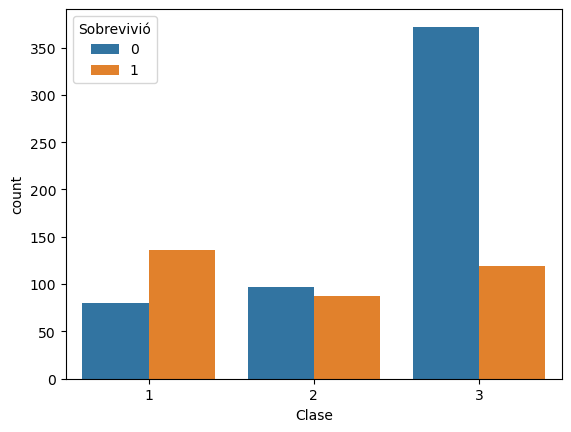

In [592]:
stats_graphs.countplot(data=Tabla, x='Clase', hue='Sobrevivió')

### 1.3.2 Gráfica Boxplot para Clase:

<Axes: xlabel='Clase', ylabel='Sobrevivió'>

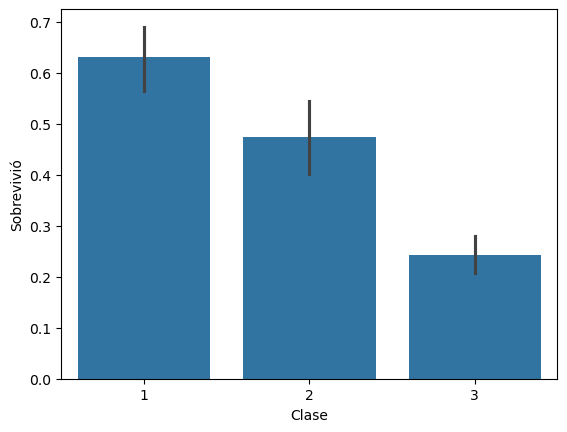

In [594]:
stats_graphs.barplot(x='Clase', y='Sobrevivió', data=Tabla, order=[1, 2, 3])

### 1.3.3 Gráfica Boxplot para Edad:

<Axes: xlabel='Sexo', ylabel='Sobrevivió'>

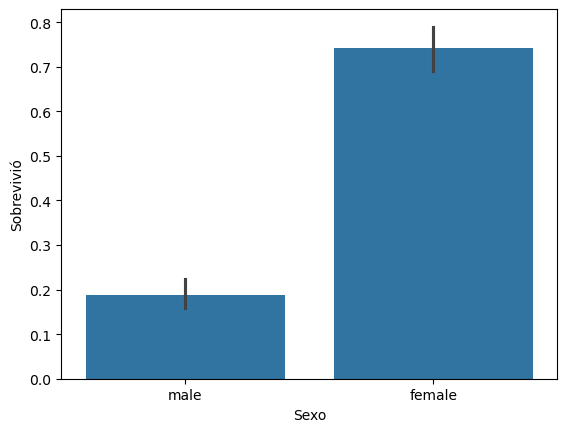

In [588]:
stats_graphs.barplot(x='Sexo', y='Sobrevivió', data=Tabla)

### 1.3.4 Boxplot para Edad:

<Axes: xlabel='Sobrevivió', ylabel='Edad'>

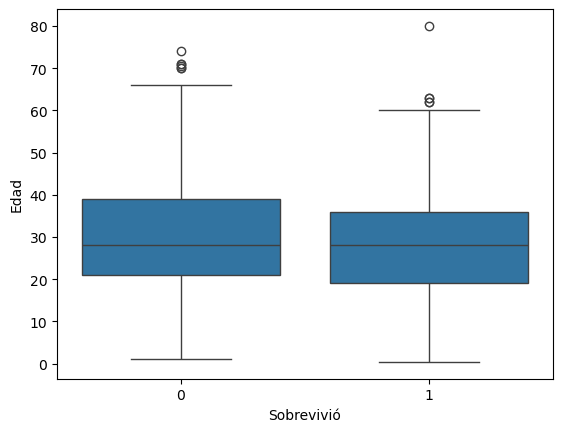

In [557]:
stats_graphs.boxplot(x='Sobrevivió', y='Edad', data=Tabla)

### Cálculo y visualización de la matriz de correlación

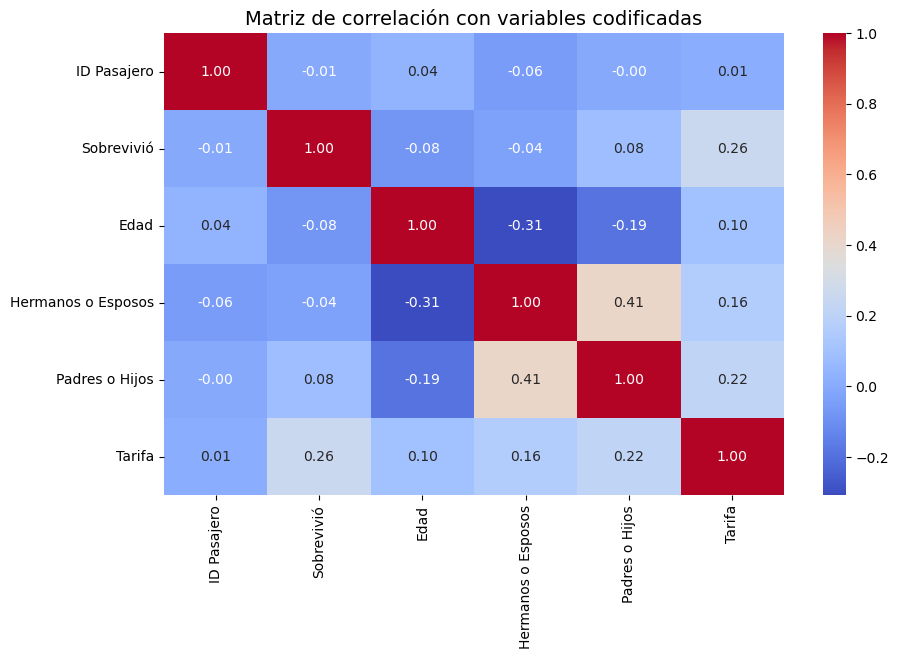

In [568]:
# Codificar variables categóricas a numéricas
Tabla_encoded = data_handler.get_dummies(Tabla, columns=['Sexo', 'Clase'], drop_first=True)

# Seleccionar columnas numéricas del DataFrame codificado
numerical_data = Tabla_encoded.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlaciones = numerical_data.corr()

# Graficar el heatmap
plotter.figure(figsize=(10, 6))  # Tamaño del gráfico
stats_graphs.heatmap(
    correlaciones,
    annot=True,        # Mostrar valores dentro de las celdas
    cmap='coolwarm',   # Mapa de colores
    fmt=".2f",         # Formato numérico con 2 decimales
    cbar=True          # Mostrar barra de colores
)
plotter.title("Matriz de correlación con variables codificadas", fontsize=14)
plotter.show()


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

### 2.1 Identificar los campos con valores ceros o nulos (Faltantes)

In [605]:
#Descripción: Edad del pasajero.
#Análisis de faltantes: los valores faltantes pueden estar justificados (por ejemplo, si no se tenía información).
print(f"Cantidad de registros con Cero o Faltante en Edad: {Tabla['Edad'].isna().sum()}")

#Descripción: Precio que pagó el pasajero por el boleto.
#Análisis de faltantes: No debería haber valores faltantes, pero si los hay, podría ser un error de captura de datos.
print(f"Cantidad de registros con Cero en Tarifa: {Tabla['Tarifa'].isin([0]).sum()}")

#Descripción: Número de hermanos o esposos a bordo del barco: 
#Análisis de faltantes: No debería haber valores faltantes.
print(f"Cantidad de registros con Cero en Hermanos o Esposos: {Tabla['Hermanos o Esposos'].isin([0]).sum()}")

#Descripción: Número de padres o hijos a bordo.
#Análisis de faltantes: No debería haber valores faltantes.
print(f"Cantidad de registros con Cero en Padres o Hijos: {Tabla['Padres o Hijos'].isin([0]).sum()}")

Cantidad de registros con Cero o Faltante en Edad: 177
Cantidad de registros con Cero en Tarifa: 15
Cantidad de registros con Cero en Hermanos o Esposos: 608
Cantidad de registros con Cero en Padres o Hijos: 678


### 2.2 Una vez identificados, se hace la imputación 

In [608]:
#Para la imputación de valores faltantes utilizamos la media o el promedio de esa misma columna.
#los datos están distribuidos de manera aproximadamente normal. 
#Es útil cuando no hay valores extremos (outliers) que puedan distorsionar el promedio.

#Tabla['Edad'] = Tabla['Edad'].replace(0, Tabla['Edad'].mean())  # Reemplazar ceros por la media
Tabla['Edad'] = Tabla['Edad'].fillna(Tabla['Edad'].mean())  # Imputar NaN con la media

# Para imputar 'Tarifa' (reemplazar ceros por la media)
Tabla['Tarifa'] = Tabla['Tarifa'].replace(0, Tabla['Tarifa'].mean())  # Reemplazar ceros por la media

# Para imputar 'Hermanos o Esposos' (reemplazar ceros por la media)
Tabla['Hermanos o Esposos'] = Tabla['Hermanos o Esposos'].replace(0, Tabla['Hermanos o Esposos'].mean())  # Reemplazar ceros por la media

# Para imputar 'Padres o Hijos' (reemplazar ceros por la media)
Tabla['Padres o Hijos'] = Tabla['Padres o Hijos'].replace(0, Tabla['Padres o Hijos'].mean())  # Reemplazar ceros por la media

### 2.3 Se verifica que ya no haya valores faltantes ejecutando nuevamente lo siguiete: 

In [611]:
## Segunda forma
print('---------------------------------------------------------------------')
print(f"Cantidad de Ceros o Faltante en Edad: {Tabla['Edad'].isna().sum()}")
columnas_a_revisar = ['Tarifa','Hermanos o Esposos','Padres o Hijos']
for col in columnas_a_revisar:
    print(f"Cantidad de ceros en {col}: {Tabla[Tabla[col] == 0].shape[0]}")

---------------------------------------------------------------------
Cantidad de Ceros o Faltante en Edad: 0
Cantidad de ceros en Tarifa: 0
Cantidad de ceros en Hermanos o Esposos: 0
Cantidad de ceros en Padres o Hijos: 0


### 2.4 Identificar valores Atípico

### 2.4.1 Graficamos los campos que requiera analisis

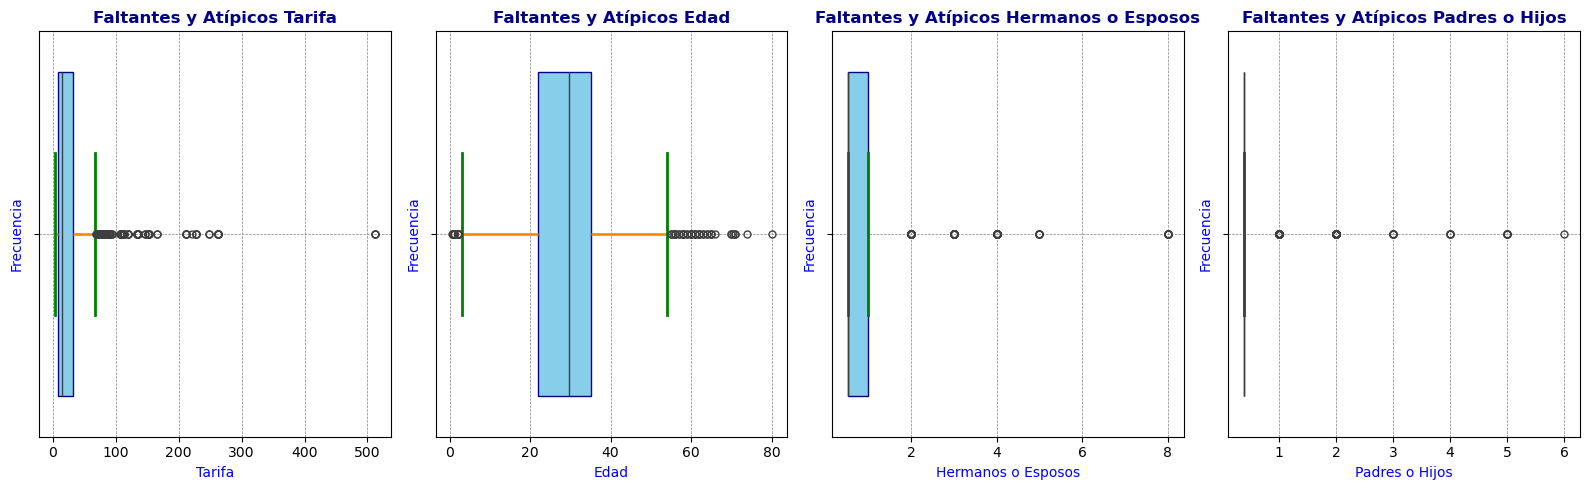

In [623]:
# Seleccionar las variables que deseas graficar
variables = ['Tarifa', 'Edad', 'Hermanos o Esposos', 'Padres o Hijos']

# Crear la figura y los subgráficos
fig, axes = plotter.subplots(1, len(variables), figsize=(16, 5))

# Graficar cada variable en su respectivo subgráfico
for i, var in enumerate(variables):
    stats_graphs.boxplot(
        x=Tabla[var], 
        ax=axes[i],  # Asignar el gráfico a cada subgráfico
        patch_artist=True,  # Rellenar la caja con color
        boxprops=dict(facecolor='skyblue', edgecolor='darkblue'),  # Relleno y borde de la caja
        whiskerprops=dict(color='darkorange', linewidth=2),  # Color de los bigotes
        capprops=dict(color='green', linewidth=2),  # Color de las tapas
        flierprops=dict(marker='o', color='red', markersize=5)  # Puntos atípicos
    )
    axes[i].set_title('Faltantes y Atípicos ' f'{var}', fontsize=12, fontweight='bold', color='darkblue')
    axes[i].set_xlabel(var, fontsize=10, color='blue')
    axes[i].set_ylabel('Frecuencia', fontsize=10, color='blue')
    axes[i].grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

# Mostrar la gráfica con los subgráficos
plotter.tight_layout()  # Ajusta los subgráficos para que no se sobrepongan
plotter.show()

### 2.4.2 Visualización de valores atípicos (outliers)

In [638]:
# Calcular los cuartiles y el IQR para cada variable numérica
for var in variables_numericas:
    Q1 = Tabla[var].quantile(0.25)
    Q3 = Tabla[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior para identificar los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    outliers = Tabla[(Tabla[var] < limite_inferior) | (Tabla[var] > limite_superior)]
    
    # Mostrar los valores atípicos
    print(f"Valores atípicos en la variable {var}:")
    print(outliers[var])
    print("-" * 50)

Valores atípicos en la variable Edad:
7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Edad, Length: 66, dtype: float64
--------------------------------------------------
Valores atípicos en la variable Hermanos o Esposos:
7      3.0
16     4.0
24     3.0
27     3.0
38     2.0
      ... 
824    4.0
846    8.0
850    4.0
860    2.0
863    8.0
Name: Hermanos o Esposos, Length: 74, dtype: float64
--------------------------------------------------
Valores atípicos en la variable Padres o Hijos:
7      1.0
8      2.0
10     1.0
13     5.0
16     1.0
      ... 
871    1.0
879    1.0
880    1.0
885    5.0
888    2.0
Name: Padres o Hijos, Length: 213, dtype: float64
--------------------------------------------------
Valores atípicos en la variable Tarifa:
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.866

### 2.4.3 Graficamos los valores Atípicos

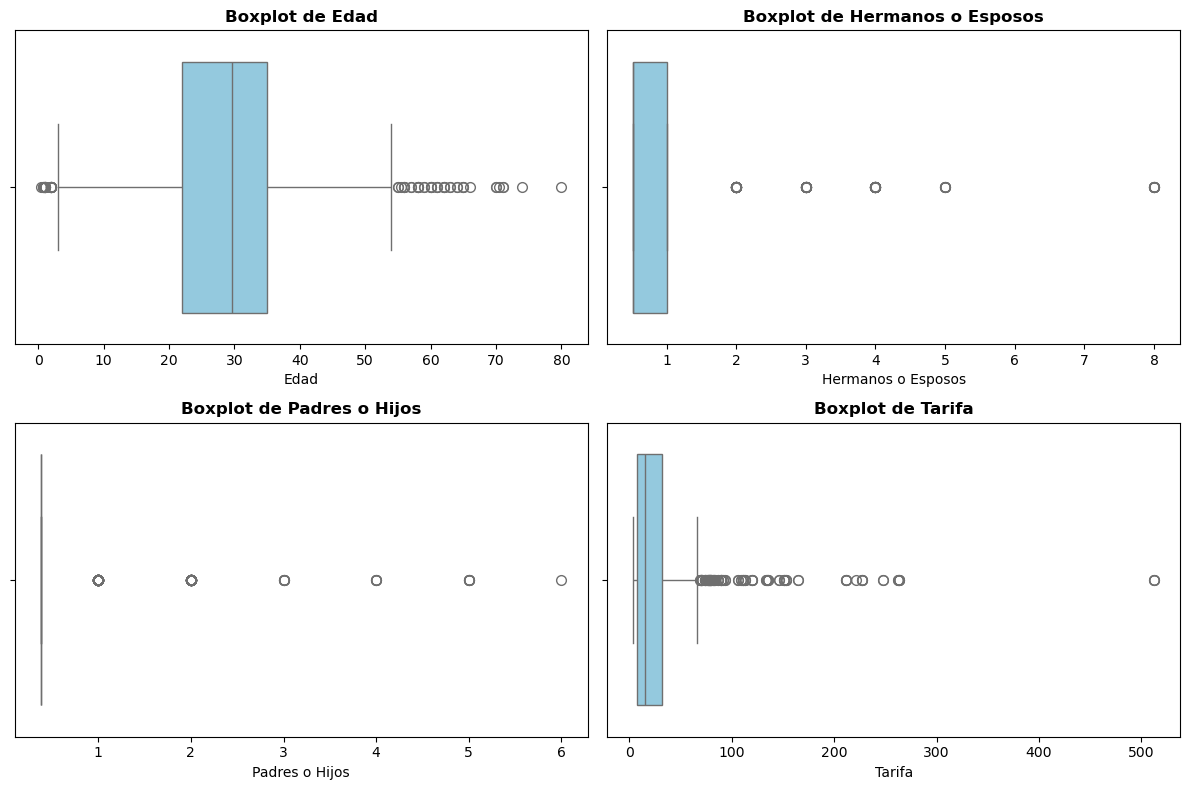

In [642]:
# Graficar los boxplots para ver visualmente los valores atípicos
plotter.figure(figsize=(12, 8))

for i, var in enumerate(variables_numericas):
    ax = plotter.subplot(2, 2, i+1)
    stats_graphs.boxplot(x=Tabla[var], ax=ax, color='skyblue', fliersize=7)
    ax.set_title(f"Boxplot de {var}", fontsize=12, fontweight='bold')

plotter.tight_layout()
plotter.show()

### 2.4.4 Filtrado de valores atípicos usando el IQR y verificarlos que se hayan filtrados

In [649]:
# Filtrar los valores atípicos utilizando el IQR
for var in variables_numericas:
    # Calcular los cuartiles y el IQR para cada variable
    Q1 = Tabla[var].quantile(0.25)
    Q3 = Tabla[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior para identificar los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar los datos, eliminando los outliers
    Tabla = Tabla[(Tabla[var] >= limite_inferior) & (Tabla[var] <= limite_superior)]

# Verificar los datos filtrados
print(Tabla.head())

    ID Pasajero  Sobrevivió  Clase                                Nombre  \
2             3           1      3                Heikkinen, Miss. Laina   
4             5           0      3              Allen, Mr. William Henry   
5             6           0      3                      Moran, Mr. James   
12           13           0      3        Saundercock, Mr. William Henry   
14           15           0      3  Vestrom, Miss. Hulda Amanda Adolfina   

      Sexo       Edad  Hermanos o Esposos  Padres o Hijos  Número de Boleto  \
2   female  26.000000            0.523008        0.381594  STON/O2. 3101282   
4     male  35.000000            0.523008        0.381594            373450   
5     male  29.699118            0.523008        0.381594            330877   
12    male  20.000000            0.523008        0.381594         A/5. 2151   
14  female  14.000000            0.523008        0.381594            350406   

    Tarifa Cabina Puerto de Embarque  
2   7.9250    NaN            

### 2.5 Por ultimo mostrar el resumen de la estructura del DataFrame o tabla

In [651]:
print(Tabla.isnull().sum())

ID Pasajero             0
Sobrevivió              0
Clase                   0
Nombre                  0
Sexo                    0
Edad                    0
Hermanos o Esposos      0
Padres o Hijos          0
Número de Boleto        0
Tarifa                  0
Cabina                286
Puerto de Embarque      0
dtype: int64


## 3. Selección de características

### 3.1 Cuantos sobrevivieron

In [661]:
# Contar la cantidad de sobrevivientes y no sobrevivientes
sobrevivientes = Tabla['Sobrevivió'].value_counts()
print(f"Cantidad de sobrevivientes y no sobrevivientes: \n{sobrevivientes}")

Cantidad de sobrevivientes y no sobrevivientes: 
Sobrevivió
0    230
1     64
Name: count, dtype: int64


### 3.2 Distribución por sexo

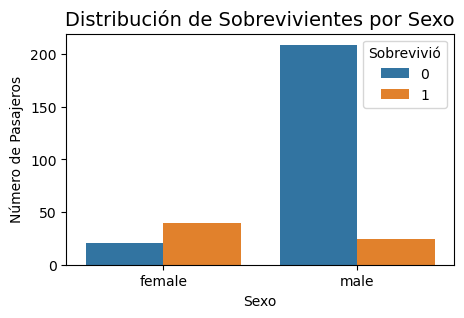

In [670]:
# Visualizar la distribución de sobrevivientes por sexo
plotter.figure(figsize=(5, 3))
stats_graphs.countplot(x='Sexo', hue='Sobrevivió', data=Tabla)
plotter.title('Distribución de Sobrevivientes por Sexo', fontsize=14)
plotter.xlabel('Sexo')
plotter.ylabel('Número de Pasajeros')
plotter.show()

### 3.2 Distribución por Clase

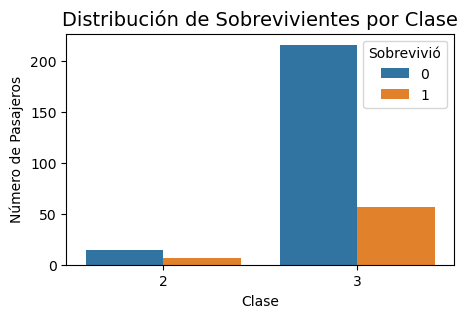

In [675]:
# Visualizar la distribución de sobrevivientes por clase
plotter.figure(figsize=(5, 3))
stats_graphs.countplot(x='Clase', hue='Sobrevivió', data=Tabla)
plotter.title('Distribución de Sobrevivientes por Clase', fontsize=14)
plotter.xlabel('Clase')
plotter.ylabel('Número de Pasajeros')
plotter.show()

### 3.2 Distribución por Clase

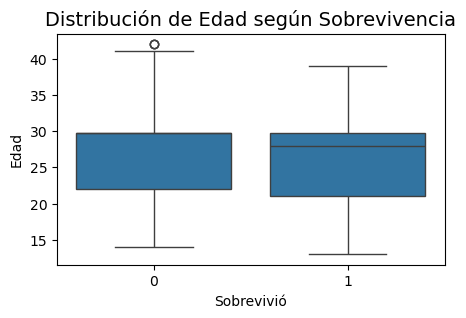

In [687]:
# Visualizar la distribución de sobrevivientes por edad
plotter.figure(figsize=(5, 3))
stats_graphs.boxplot(x='Sobrevivió', y='Edad', data=Tabla)
plotter.title('Distribución de Edad según Sobrevivencia', fontsize=14)
plotter.xlabel('Sobrevivió')
plotter.ylabel('Edad')
plotter.show()

### Datos Sobrevivió

In [715]:
# Si tienes menos de 60 registros, ajusta la cantidad a las filas disponibles
Tabla[['Sobrevivió']].head(891)  # Muestra las primeras filas disponibles


,Sobrevivió
2,1
4,0
5,0
12,0
14,0
...,...
881,0
882,0
883,0
884,0


## 4. Dividir el dataset en Train y Test

### 4.1. Dividir datos:

In [808]:
X = Tabla.drop('Sobrevivió', axis=1)
y = Tabla['Sobrevivió']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [800]:
#print(X_train.shape, X_test.shape)
print(X_train)

     ID Pasajero       Edad  Hermanos o Esposos  Padres o Hijos  \
471          472  38.000000            0.523008        0.381594   
598          599  29.699118            0.523008        0.381594   
713          714  29.000000            0.523008        0.381594   
715          716  19.000000            0.523008        0.381594   
226          227  19.000000            0.523008        0.381594   
..           ...        ...                 ...             ...   
776          777  29.699118            0.523008        0.381594   
589          590  29.699118            0.523008        0.381594   
368          369  29.699118            0.523008        0.381594   
127          128  24.000000            0.523008        0.381594   
524          525  29.699118            0.523008        0.381594   

    Número de Boleto   Tarifa Puerto de Embarque  Sexo_male  Clase_3  
471           315089   8.6625                  S       True     True  
598             2664   7.2250                  C     

## 5. Entrenar el modelo

In [859]:

model = LogReg(solver = "liblinear")
model.fit(X_train, y_train)

prediccion=model.predict(X_test)

ValueError: could not convert string to float: 'SW/PP 751'

In [857]:
print(y_test)

667    0
654    0
121    0
717    1
67     0
      ..
101    0
843    0
478    0
289    1
680    0
Name: Sobrevivió, Length: 74, dtype: int64


In [824]:
print(prediccion)

NameError: name 'prediccion' is not defined

## 6. Evaluar el desempeño del modelo

In [870]:
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'A4. 54510'

## 6. Evaluar el desempeño del modelo

In [866]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

## 7. Graficar los resultados

In [873]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [875]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.title("Curva ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'classes_'